**Google Drive Bağlantısı**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dosyaları Zipten Çıkarma**

In [2]:
%cd /content
!unzip /content/drive/MyDrive/detr_ob_data.zip

/content
Archive:  /content/drive/MyDrive/detr_ob_data.zip
   creating: detr_ob_data/
   creating: detr_ob_data/train/
  inflating: detr_ob_data/train/006e241d-McLaren05301.jpg  
  inflating: detr_ob_data/train/0097a806-RedBull07721.jpg  
  inflating: detr_ob_data/train/00b39fc6-french01401.jpg  
  inflating: detr_ob_data/train/00c48e11-McLaren05241.jpg  
  inflating: detr_ob_data/train/00d09235-Mercedes05221.jpg  
  inflating: detr_ob_data/train/00de7c00-McLaren02661.jpg  
  inflating: detr_ob_data/train/016eac18-Mercedes05081.jpg  
  inflating: detr_ob_data/train/01eede69-McLaren04161.jpg  
  inflating: detr_ob_data/train/024d7e5e-scene01021.jpg  
  inflating: detr_ob_data/train/02ab0185-McLaren02941.jpg  
  inflating: detr_ob_data/train/02fe032b-scene06321.jpg  
  inflating: detr_ob_data/train/035583c2-RedBull02341.jpg  
  inflating: detr_ob_data/train/040018f1-Mercedes06721.jpg  
  inflating: detr_ob_data/train/04018263-Mercedes05021.jpg  
  inflating: detr_ob_data/train/042e5808-M

**Kurulumlar**

In [3]:
!git clone https://github.com/facebookresearch/detr.git
%cd detr
!pip install -r requirements.txt

Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.87 MiB | 5.86 MiB/s, done.
Resolving deltas: 100% (120/120), done.
/content/detr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-vkg85jvs/pycocotools_f74945c63474401e88b1cb0687e720da
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-vkg85jvs/pycocotools_f74945c63474401e88b1cb0687e720da
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-vkg85jvs/panopticapi_e69cd9775afe45d09e36c38e839bcbd7
  Running command git clone --filter=blob:none --quiet https://github.com/cocodat

**Eğitim**

In [4]:
!wget https://dl.fbaipublicfiles.com/detr/detr-r50-dc5-f0fb7ef5.pth

--2023-02-04 09:32:01--  https://dl.fbaipublicfiles.com/detr/detr-r50-dc5-f0fb7ef5.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166618694 (159M) [application/octet-stream]
Saving to: ‘detr-r50-dc5-f0fb7ef5.pth’

detr-r50-dc5-f0fb7e 100%[===================>] 158.90M  4.39MB/s    in 25s     

2023-02-04 09:32:26 (6.47 MB/s) - ‘detr-r50-dc5-f0fb7ef5.pth’ saved [166618694/166618694]



In [6]:
!python main.py --resume detr-r50-dc5-f0fb7ef5.pth --lr 0.001 --batch_size 4 --epochs 40 --coco_path /content/detr_ob_data/ --dataset_file coco --output_dir output 

Not using distributed mode
git:
  sha: 8a144f83a287f4d3fece4acdf073f387c5af387d, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=4, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/detr_ob_data/', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=40, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='output', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50-dc5-f0fb7ef5.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'p

**Test**

In [11]:
!python main.py --eval --resume /content/detr/output/eval/latest.pth --coco_path /content/detr_ob_data/ --dataset_file coco

Not using distributed mode
git:
  sha: 8a144f83a287f4d3fece4acdf073f387c5af387d, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/detr_ob_data/', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=300, eval=True, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/detr/output/checkpoint.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The paramet

**Resim Üzerinden Test**

In [12]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
torch.set_grad_enabled(False);

class DETRdemo(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, nheads=8,
                 num_encoder_layers=6, num_decoder_layers=6):
        super().__init__()
        self.backbone = resnet50()
        del self.backbone.fc
        self.conv = nn.Conv2d(2048, hidden_dim, 1)
        self.transformer = nn.Transformer(
            hidden_dim, nheads, num_encoder_layers, num_decoder_layers)
        self.linear_class = nn.Linear(hidden_dim, num_classes + 1)
        self.linear_bbox = nn.Linear(hidden_dim, 4)
        self.query_pos = nn.Parameter(torch.rand(100, hidden_dim))
        self.row_embed = nn.Parameter(torch.rand(50, hidden_dim // 2))
        self.col_embed = nn.Parameter(torch.rand(50, hidden_dim // 2))

    def forward(self, inputs):
        x = self.backbone.conv1(inputs)
        x = self.backbone.bn1(x)
        x = self.backbone.relu(x)
        x = self.backbone.maxpool(x)

        x = self.backbone.layer1(x)
        x = self.backbone.layer2(x)
        x = self.backbone.layer3(x)
        x = self.backbone.layer4(x)

        h = self.conv(x)

        H, W = h.shape[-2:]
        pos = torch.cat([
            self.col_embed[:W].unsqueeze(0).repeat(H, 1, 1),
            self.row_embed[:H].unsqueeze(1).repeat(1, W, 1),
        ], dim=-1).flatten(0, 1).unsqueeze(1)
        h = self.transformer(pos + 0.1 * h.flatten(2).permute(2, 0, 1),
                             self.query_pos.unsqueeze(1)).transpose(0, 1)
        return {'pred_logits': self.linear_class(h), 
                'pred_boxes': self.linear_bbox(h).sigmoid()}
  
detr = DETRdemo(num_classes=4)
state_dict = torch.load("/content/detr/output/checkpoint.pth", map_location='cuda')
detr.load_state_dict(state_dict['model'], strict=False)
detr.eval();

CLASSES = ['ferrari','mclaren','mercedes','redbull']

COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]
transform = T.Compose([
    T.Resize(600),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)
def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b
def detect(im, model, transform):
    img = transform(im).unsqueeze(0)
    assert img.shape[-2] <= 1600 and img.shape[-1] <= 1600, 'demo model only supports images up to 1600 pixels on each side'
    outputs = model(img)
    probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > 0.001
    bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)
    return probas[keep], bboxes_scaled

In [13]:
im = Image.open("/content/detr_ob_data/val/d723f922-scene16701.jpg")
scores, boxes = detect(im, detr, transform)

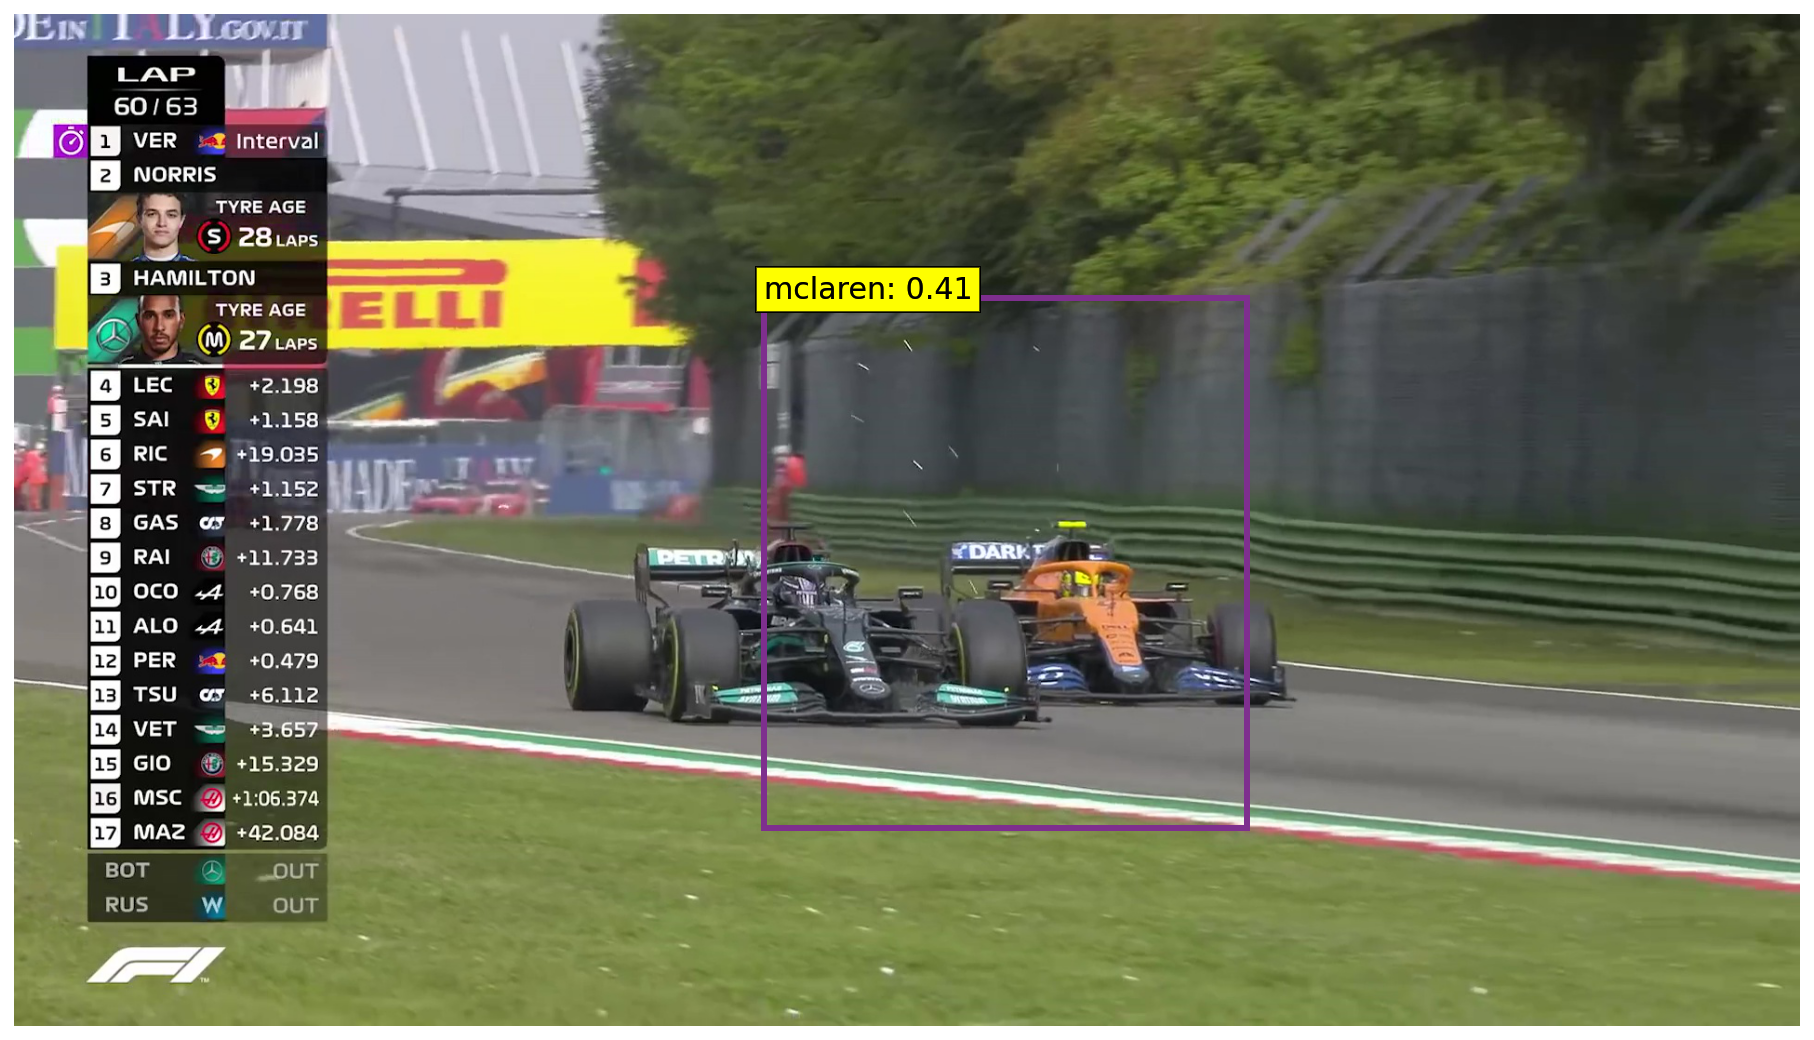

In [14]:
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), COLORS * 100):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()
plot_results(im, scores, boxes)

**Analiz**

In [ ]:
!pip install detr

In [15]:
from detr.util.plot_utils import plot_logs
from pathlib import Path

log_directory = [Path('/content/detr/output')]

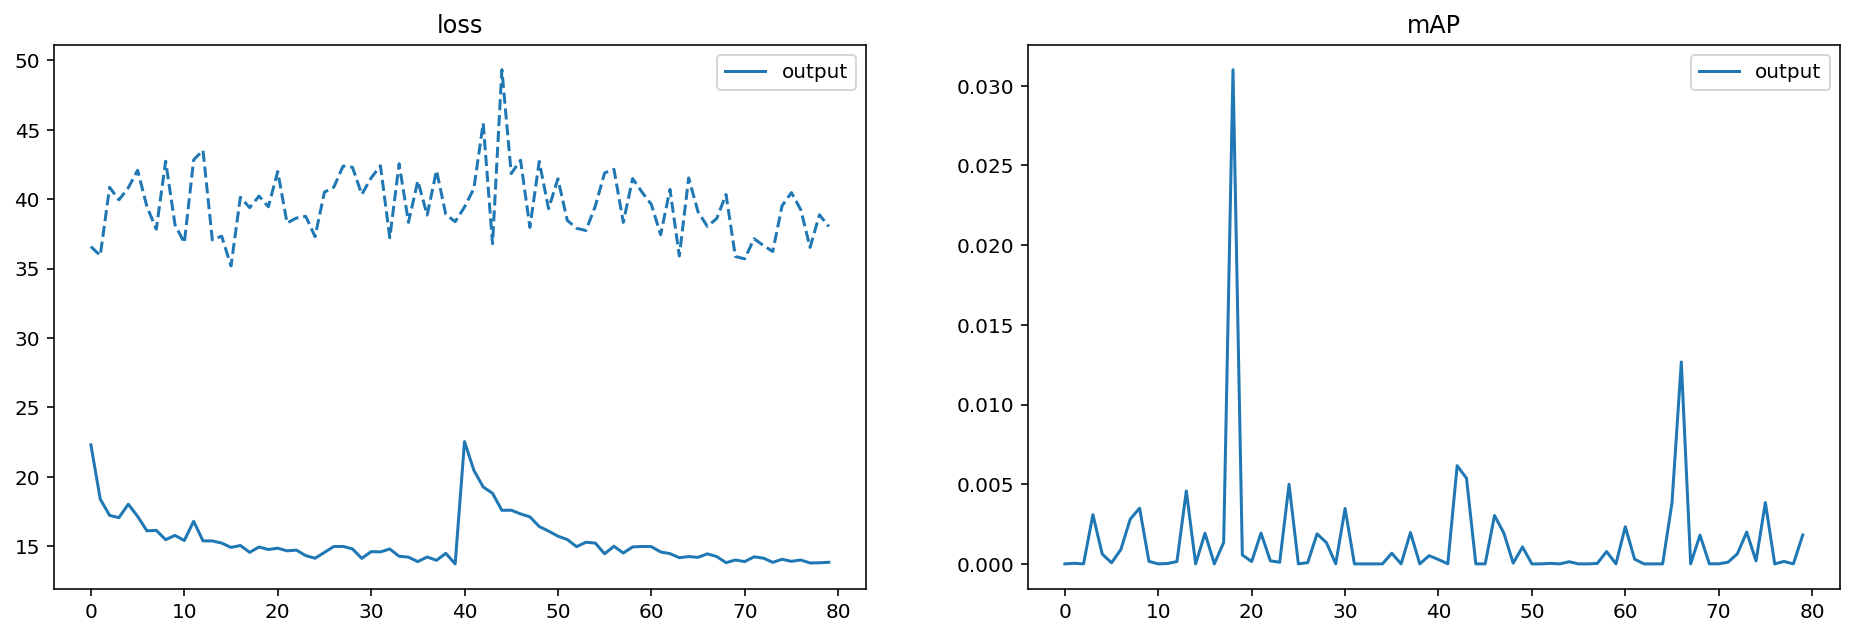

In [16]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

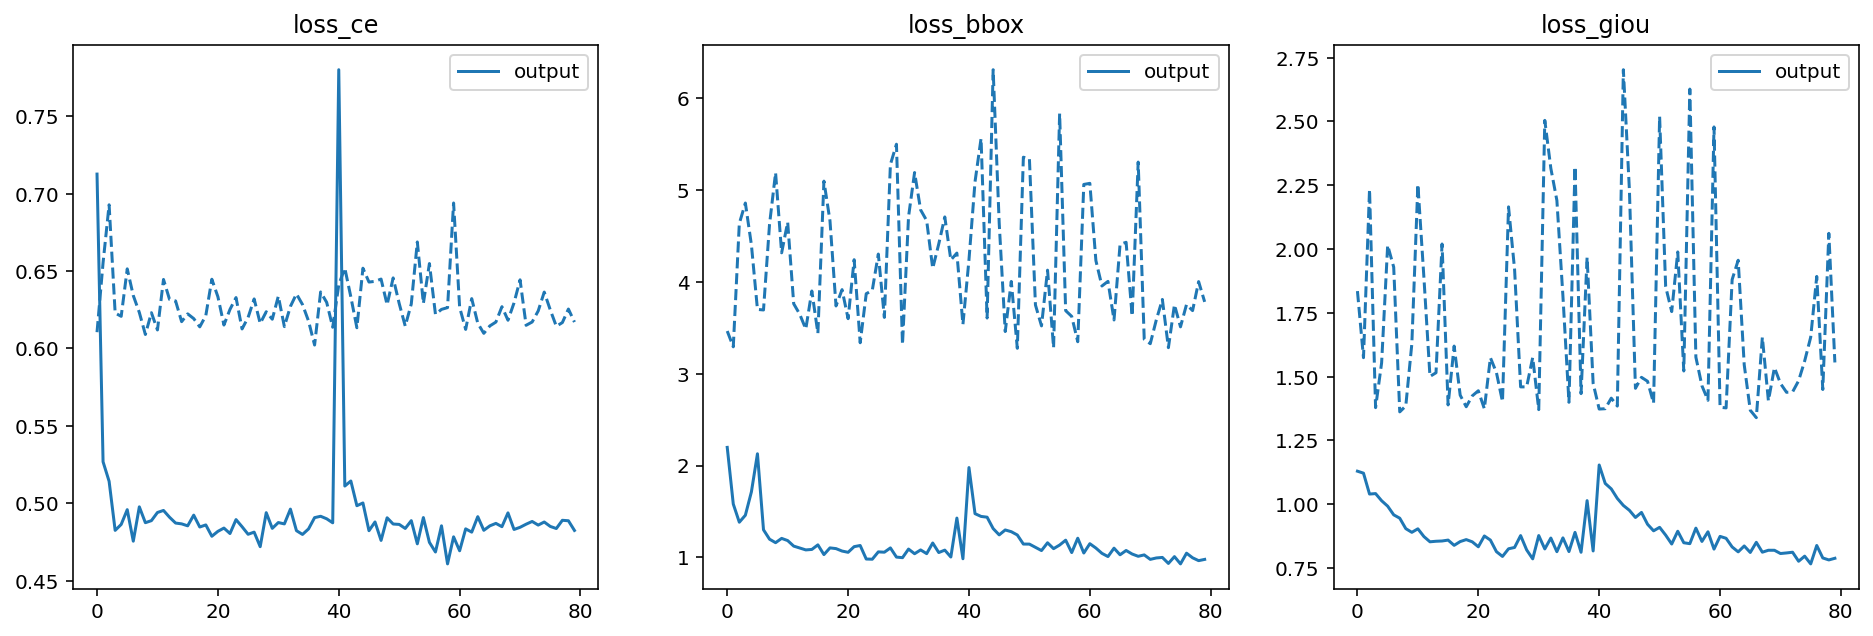

In [17]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

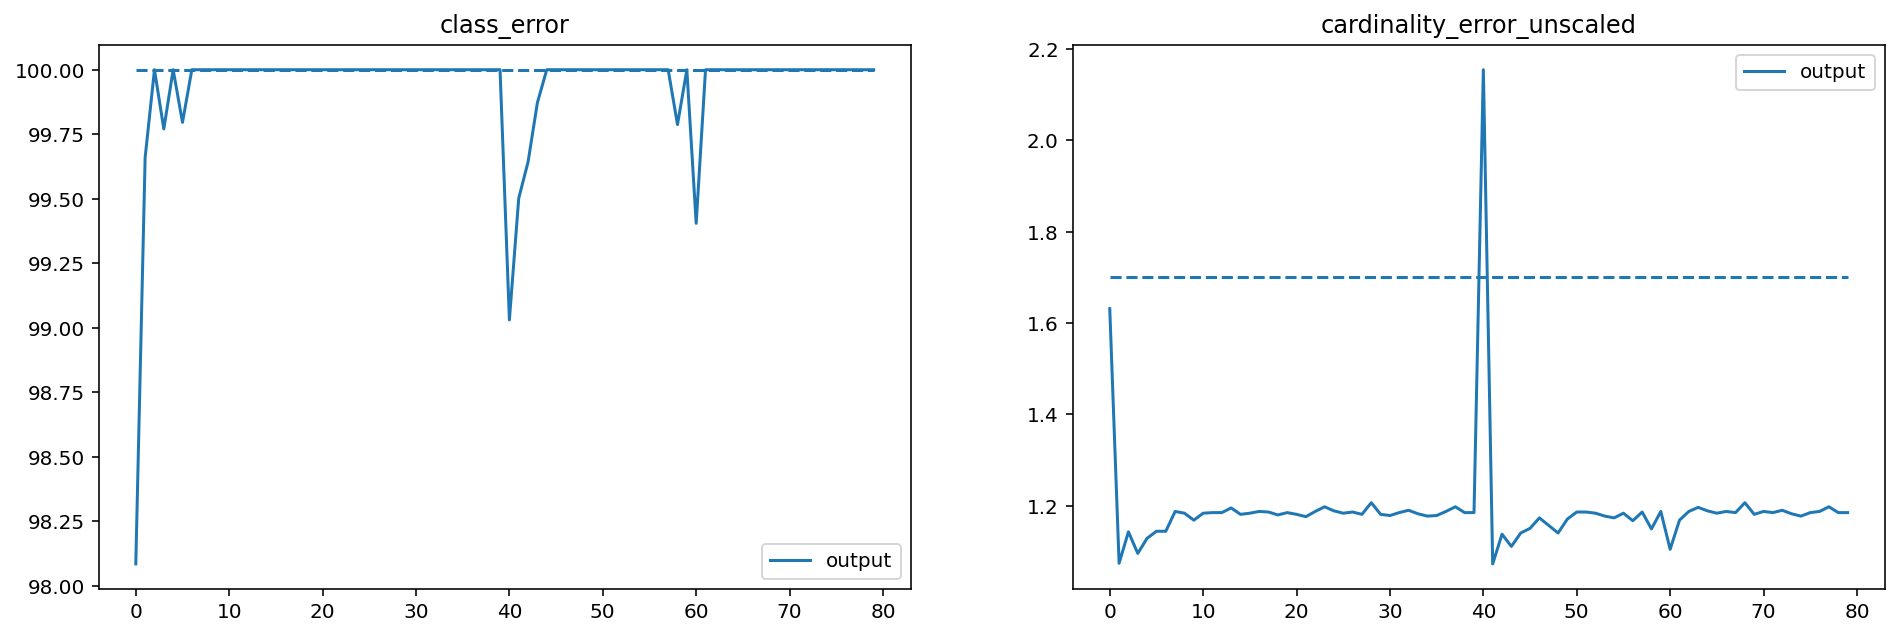

In [18]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)